<a href="https://colab.research.google.com/github/gurman3911/Stock-Prediction-Model/blob/main/Test_Stock_prediction_with_convo1d%2Blstm_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import yfinance as yf 
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense , Dropout , LSTM , Input ,concatenate, Conv1D, MaxPooling1D, Flatten
from keras.models import Model , Sequential
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
#from statistics import stdev

# Creating convolutional network for the prediction model 

In [29]:
#stock that we are calling 

stock = yf.Ticker("RELIANCE.NS")
stock_data = stock.history(period='max')

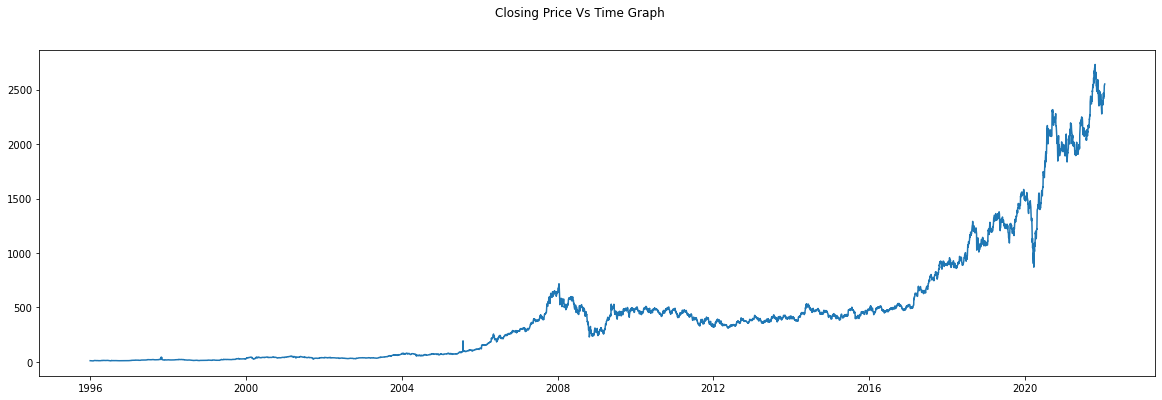

In [30]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Closing Price Vs Time Graph')
plt.plot(stock_data.Close)

In [31]:
stock_data.tail

<bound method NDFrame.tail of                    Open         High          Low        Close     Volume  \
Date                                                                        
1996-01-01    10.471226    10.527413    10.402269    10.509536   48051995   
1996-01-02    10.483998    10.535077    10.351192    10.427811   77875009   
1996-01-03    10.598926    11.081624    10.483998    10.506984   96602936   
1996-01-04    10.407380    10.440582    10.269466    10.409934  100099436   
1996-01-05    10.369071    10.369071    10.249035    10.338424   76935930   
...                 ...          ...          ...          ...        ...   
2022-01-11  2436.000000  2474.949951  2435.000000  2455.550049    7478681   
2022-01-12  2471.300049  2524.949951  2465.000000  2521.100098    6830402   
2022-01-13  2521.250000  2541.000000  2508.399902  2535.300049    5471871   
2022-01-14  2535.000000  2567.300049  2525.850098  2539.000000    9197773   
2022-01-17  2538.000000  2565.000000  2537.000

# New fromula to make code for the Conv1d

In [32]:
test_data = stock_data
test_data.drop(['Dividends','Stock Splits',],axis='columns', inplace=True)
test_data = test_data.reset_index()
test_data.drop('Date',axis = 'columns',inplace = True)

In [33]:
#scaling the stock price data from the test_dataset
scaler_1 = StandardScaler()
test_dataset = scaler_1.fit_transform(test_data)

In [34]:
final_dataframe = pd.DataFrame(test_dataset, columns = ['open','high','low','close','volume'])
final_dataframe.head(10)

,open,high,low,close,volume
0,-0.796894,-0.798036,-0.795989,-0.796999,0.369025
1,-0.796871,-0.798022,-0.796082,-0.797146,0.975443
2,-0.796664,-0.797049,-0.795840,-0.797003,1.356254
3,-0.797009,-0.798191,-0.796231,-0.797178,1.427352
4,-0.797078,-0.798318,-0.796269,-0.797307,0.956348
5,-0.797170,-0.798396,-0.797047,-0.798054,1.146523
6,-0.798408,-0.799319,-0.797983,-0.798570,3.040159
7,-0.798734,-0.799552,-0.797914,-0.799017,1.987641
8,-0.799010,-0.799456,-0.798030,-0.798487,3.236091
9,-0.798182,-0.799278,-0.797601,-0.798671,2.908044


In [35]:
closing_list = np.array(final_dataframe.loc[0:,'close'])

In [36]:
scaled = 0
input_set = 90
output_set = 10
for i in range(0,len(closing_list)+1,input_set):
  scaled = i

closing_list = closing_list[len(closing_list)-scaled:]

In [37]:
X_train = []
Y_train = []
next_set = input_set+output_set

for i in range(0,len(closing_list)-input_set,output_set):

  X_train.append(closing_list[i:i+input_set])
  Y_train.append(closing_list[i+input_set:i+next_set])



X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [38]:
#creating training and testing dataset 
Y_test = [Y_train[-1]]
Y_train = Y_train[:len(Y_train)-1]
X_test = [X_train[-1]]
X_train = X_train[:len(X_train)-1]

In [39]:
Y_train.shape[1]

10

# Modeling 

In [40]:
input_layer = Input(shape=(X_train.shape[1],1))
conv1 = Conv1D(filters=64,
               kernel_size=8,
               strides=1,
               activation='relu',
               padding = 'same')(input_layer)
lstm1 = LSTM(300,activation = 'tanh', return_sequences = False,)(conv1)
dense1 = Dense((0.2))(lstm1)
#lstm2 = LSTM(120,activation = 'relu', return_sequences = False)(lstm1)
output_layer = Dense(Y_train.shape[1], activation='relu')(lstm1)
convo_model = Model(inputs=input_layer, outputs=output_layer) 

convo_model.compile(optimizer= 'rmsprop',loss = 'mse',)

In [41]:
convo_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 90, 1)]           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 90, 64)            576       
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               438000    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3010      
Total params: 441,586
Trainable params: 441,586
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = convo_model.fit(X_train,
                Y_train,
                epochs=90,
                batch_size=6,
                validation_split=0.1)

Epoch 1/90
96/96 [==============================] - 6s 61ms/step - loss: 0.2511 - val_loss: 0.3532
Epoch 2/90
96/96 [==============================] - 6s 62ms/step - loss: 0.2511 - val_loss: 0.3372
Epoch 3/90
96/96 [==============================] - 6s 60ms/step - loss: 0.2510 - val_loss: 0.5288
Epoch 4/90
96/96 [==============================] - 6s 62ms/step - loss: 0.2512 - val_loss: 0.5719
Epoch 5/90
96/96 [==============================] - 6s 61ms/step - loss: 0.2508 - val_loss: 0.4233
Epoch 6/90
96/96 [==============================] - 6s 63ms/step - loss: 0.2512 - val_loss: 0.3847
Epoch 7/90
96/96 [==============================] - 7s 74ms/step - loss: 0.2509 - val_loss: 0.4392
Epoch 8/90
96/96 [==============================] - 9s 91ms/step - loss: 0.2508 - val_loss: 0.6350
Epoch 9/90
96/96 [==============================] - 9s 98ms/step - loss: 0.2507 - val_loss: 0.8240
Epoch 10/90
96/96 [==============================] - 8s 82ms/step - loss: 0.2507 - val_loss: 0.3329
Epoch 11/

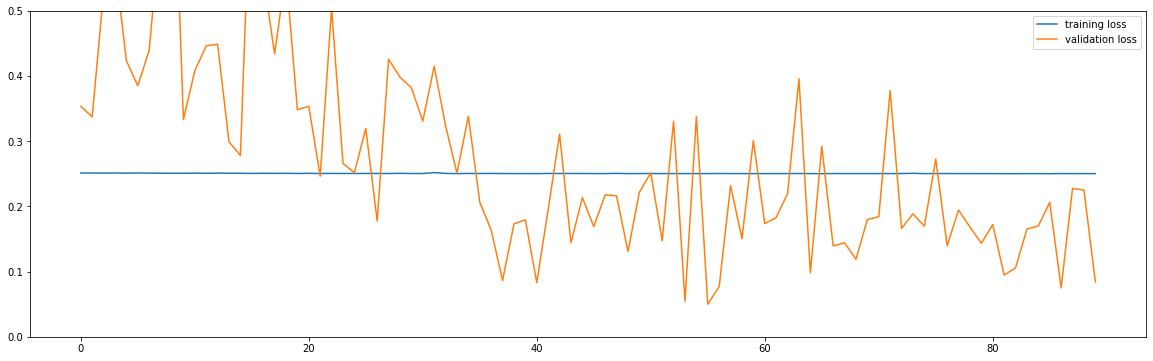

In [51]:
plt.figure(figsize =(20,6))
plt.plot(history.history['loss'] , label = 'training loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.ylim(0,0.5)
plt.legend()

In [52]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [53]:
Y_predict = convo_model.predict(X_test)

In [54]:
Y_predict = Y_predict.T

In [47]:
Y_test = Y_test.T

In [55]:
future_copies = np.repeat(Y_predict , 5 , axis = 1)
Y_predict_future = scaler_1.inverse_transform(future_copies)[:,0]

original_copies = np.repeat(Y_test, 5, axis=1)
Y_original = scaler_1.inverse_transform(original_copies)[:,0]

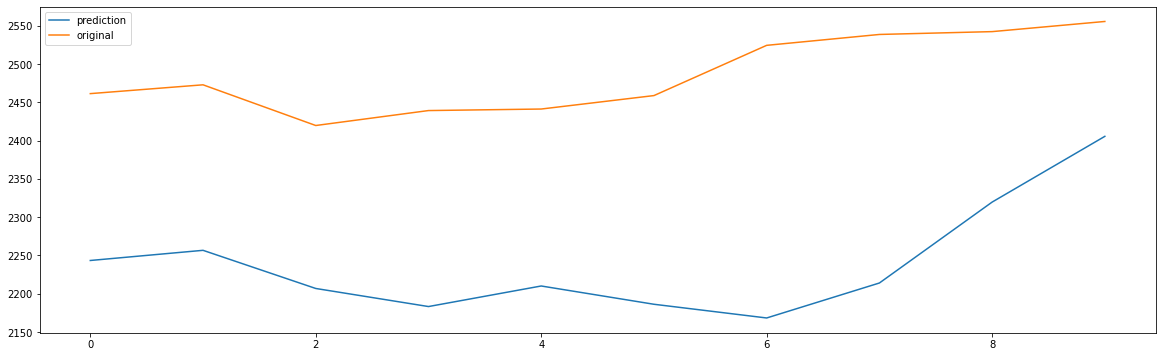

In [56]:
plt.figure(figsize =(20,6))
plt.plot(Y_predict_future, label = 'prediction')
plt.plot(Y_original, label = 'original')
plt.legend()
